In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Allgemein
jahre = 30                    # Betrachtungszeitraum
zins = 0.02                   # Opportunitätszins
inflation = 0.012             # Mietsteigerung pro Jahr

# Miete
startmiete = 20000           # jährliche Miete zu Beginn

# Kauf
kaufpreis = 1500000          # Immobilienpreis
wertsteigerung = 0.012       # jährliche Wertsteigerung
hypozins = 0.015             # Hypothekarzins
unterhalt_kosten_proz = 0.01 # Anteil des Kaufpreises
eigenkapital = 375000        # Eigenmittel

In [54]:
def npv_miete(startmiete, inflation, zins, jahre):
    npv = 0
    for t in range(1, jahre+1):
        miete = startmiete * ((1 + inflation) ** t)
        npv += miete / ((1 + zins) ** t)
    return npv

def npv_kauf(kaufpreis, hypozins, unterhalt_kosten_proz, wertsteigerung, zins, jahre):
    npv = -eigenkapital
    for t in range(1, jahre+1):
        zinsen = (kaufpreis - eigenkapital) * hypozins
        unterhalt = kaufpreis * unterhalt_kosten_proz
        kosten = zinsen + unterhalt
        npv -= kosten / ((1 + zins) ** t)
    verkaufserlös = kaufpreis * ((1 + wertsteigerung) ** jahre)
    npv += verkaufserlös / ((1 + zins) ** jahre)
    return npv

In [55]:
miete_npvs = []
kauf_npvs = []
break_even_jahr = None

for jahr in range(1, jahre+1):
    miete_npv = npv_miete(startmiete, inflation, zins, jahr)
    kauf_npv = npv_kauf(kaufpreis, hypozins, unterhalt_kosten_proz, wertsteigerung, zins, jahr)
    miete_npvs.append(miete_npv)
    kauf_npvs.append(kauf_npv)
    if break_even_jahr is None and miete_npv > kauf_npv:
        break_even_jahr = jahr

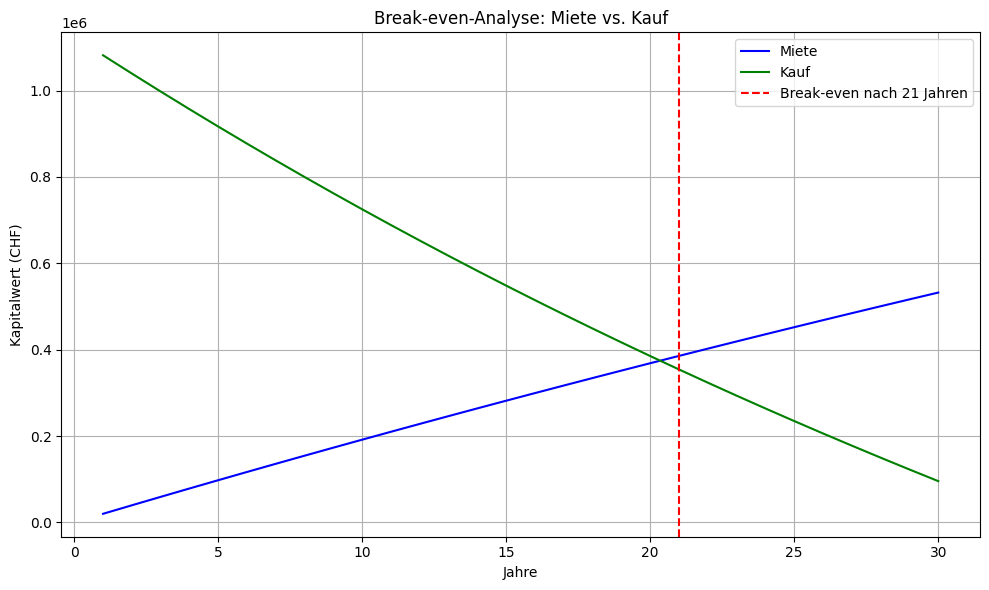

In [56]:
plt.figure(figsize=(10,6))
plt.plot(range(1, jahre+1), miete_npvs, label='Miete', color='blue')
plt.plot(range(1, jahre+1), kauf_npvs, label='Kauf', color='green')
if break_even_jahr:
    plt.axvline(break_even_jahr, color='red', linestyle='--', label=f'Break-even nach {break_even_jahr} Jahren')
plt.title('Break-even-Analyse: Miete vs. Kauf')
plt.xlabel('Jahre')
plt.ylabel('Kapitalwert (CHF)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [57]:
if break_even_jahr:
    print(f"Break-even wird im Jahr {break_even_jahr} erreicht.")
else:
    print("Miete bleibt während des Betrachtungszeitraums günstiger.")


Break-even wird im Jahr 21 erreicht.
